In [209]:
import numpy as np
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline

In [210]:
k,gamma,D = 1.0,1.0,1.0
coupling=0.1
delta_t=0.001
ampl = np.sqrt(2*D*delta_t)
N=1000

In [211]:
# random force
w1=np.random.normal(0,1,N)
w2=np.random.normal(0,1,N)

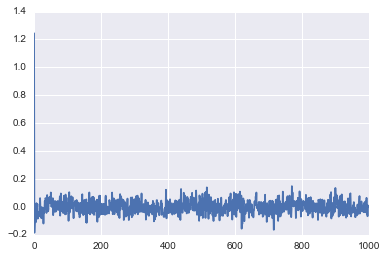

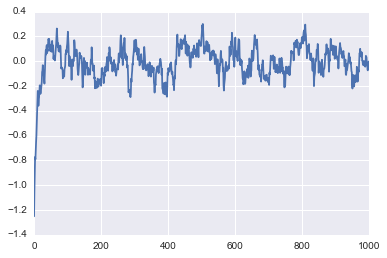

In [212]:
# differential equation, coupled oscillator
# x_i = x_(i-1) - k/gamma*x_(i-1) + coupling*(y_(i-1)-x_(i-1)) + sqrt(2*D*delta_t)*w1_i
# y_i = y_(i-1) - k/gamma*y_(i-1) + coupling*(x_(i-1)-y_(i-1)) + sqrt(2*D*delta_t)*w2_i

x=np.zeros(N)
y=np.zeros(N)

# initial value is random
x[0]=w1[0]
y[0]=w2[0]

noise=np.sqrt(2*D*delta_t)
for i in range(1,N):
    x[i] = x[i-1] - k/gamma*x[i-1] + coupling*(y[i-1]-x[i-1]) + noise*w1[i]
    y[i] = y[i-1] + coupling*(x[i-1]-y[i-1]) + noise*w2[i]
    
plt.figure()
plt.plot(x)
plt.figure()
plt.plot(y)

In [213]:
print("std: ",x.std(),"mean: ",x.mean())
print("std: ",y.std(),"mean: ",y.mean())

std:  0.0611415003112 mean:  0.000246065635382
std:  0.13632995592 mean:  -0.0119091858793


In [214]:
# see http://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.signal.fftconvolve.html
from scipy import signal
autocorr1 = signal.fftconvolve(x, x[::-1], mode='full')
autocorr2 = signal.fftconvolve(y, y[::-1], mode='full')

1999


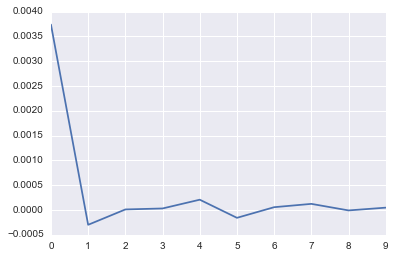

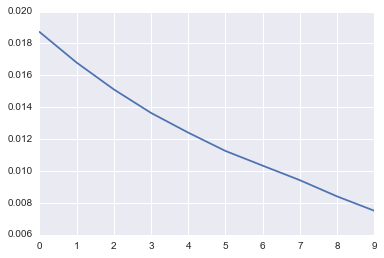

In [215]:
n=len(autocorr1)
print(n)
autocorr1=autocorr1[int((n-1)/2):]*2.0/(n+1)
autocorr2=autocorr2[int((n-1)/2):]*2.0/(n+1)
plt.figure()
plt.plot(autocorr1[:10])
plt.figure()
plt.plot(autocorr2[:10])

In [216]:
import lmfit as lm

[[Model]]
    Model(exponential)
[[Fit Statistics]]
    # function evals   = 44
    # data points      = 20
    # variables        = 2
    chi-square         = 0.000
    reduced chi-square = 0.000
    Akaike info crit   = -357.633
    Bayesian info crit = -355.642
[[Variables]]
    amplitude:   0.00373834 +/- 0        (0.00%) (init= 0.0001448052)
    decay:       0.01870915 +/- 0        (0.00%) (init= 10.33297)
[[Correlations]] (unreported correlations are <  0.250)



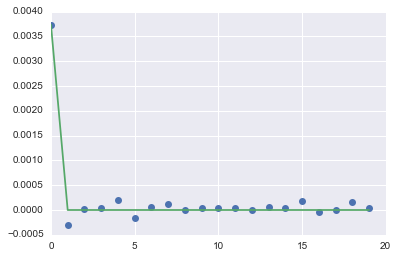

In [217]:
from lmfit.models import ExponentialModel

mod = ExponentialModel()
acf1 = autocorr1[:20]
t = np.arange(20)

pars = mod.guess(acf1, x=t)
out  = mod.fit(acf1, pars, x=t)
print(out.fit_report(min_correl=0.25))

plt.plot(t,acf1,"o")
plt.plot(t,out.best_fit)

In [218]:
# now lets model this data using pymc
import pymc as pm